In [3]:
import pandas as pd
import numpy as np
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Modelo de Regressão Não Linear Múltipla <br> 
## DIAGNÓSTICO DE HETEROCEDASTICIDADE


Exmplo da aula do MBA DSA USP/ESALQ com Prof. Fávero e Belfiore

Correlação entre o termo de erro e a variável explicativa. No exemplo, temos uma figura de um cone entre SAEB e rendimento.

**corr[X,u] <> 0 -> existe heterocedasticidade (correlação estatisticamente diferente de 0)**

Variância não constante dos termos de erro ao longo de X ou ao longo de Yhat se tiver mais de uma variável X.

**Sobre o fenômeno da Heterocedasticidade podemos afirmar:**

- É decorrente da omissão de variáveis preditoras significativas no modelo final estimado;
- Pode ser reduzido por meio da inclusão de variáveis preditoras de Y cuja os parâmetros Beta se mostrarem estatisticamente significantes após o procedimento stepwise;
- Os termos de erro serão heterocedásticos quando eles estiverem fazendo as vezes de variáveis preditoras significantes para a explicação do comportamento de Y que foram omitidas no modelo final estimado e se fossem consideradas ficariam no modelo após o procedimento stepwise;

## DIAGNÓSTICO DE MULTICOLINEARIDADE

**Correlação elevada entre variáveis explicativas.**

<b>Uma variável no modelo múltiplo pode apresentar um beta não estatisticamente significante em função de:

1) A correlação entre ela e o Y já não é estatisticamente significante individualmente;<br>
2) Pode não ser considerada em função de problemas de correlação com outras variáveis explicativas (multicolinearidade); <br>
3) Na forma funcional não linear; </b>


## Aplicação MQO (OLS)

1) Estimação do modelo linear com stepwise<br>
2) Aplica teste Shapiro Francia nos resíduos:<br>
- Deu aderência à normalidade? Modelo validado <br>
- Não deu aderência à normalidade? Aplica transformação Box-Cox <br>

3) Aplica modelo novamente com stepwise<br>
4) Aplica teste shapiro Francia novamente nos resíduos:



## Contexto

Despesas Médicas em unidades monetárias para reembolso;
idade em anos;
Dcron: quantidade de doenças crônicas
Renda
Plano

In [4]:
#Importa base e transforma em objeto
rData = pyreadr.read_r(r'bases\planosaude.RData')

#Verifica o nomne do objeto
print(rData.keys())

odict_keys(['planosaude'])


In [8]:
#Transforma o objeto em um pandas DataFrame
planosaude = rData['planosaude']
planosaude['id'] = planosaude['id'].astype('str')
planosaude.head()

,id,despmed,idade,dcron,renda,plano
rownames,,,,,,
1,1,206.84,57,5,57.200001,bronze
2,2,184.19,67,4,67.199997,bronze
3,3,175.68,62,4,62.000000,bronze
4,4,180.04,67,5,67.199997,bronze
5,5,218.86,68,5,68.000000,bronze


In [9]:
planosaude.groupby('plano')['id'].count()

plano
bronze       72
esmeralda    66
ouro         62
Name: id, dtype: int64

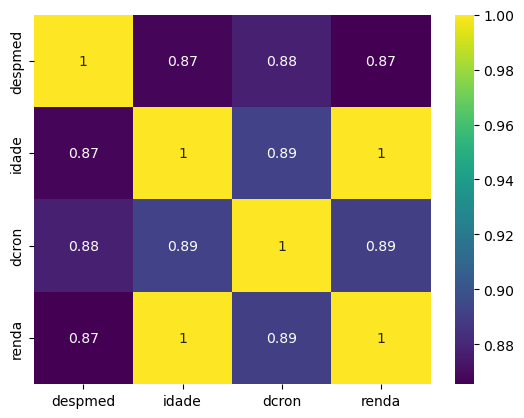

In [10]:
matriz_corr = planosaude.corr()

#Gráfico matriz correlação

sns.heatmap(matriz_corr, cmap='viridis', annot=True)
plt.show()

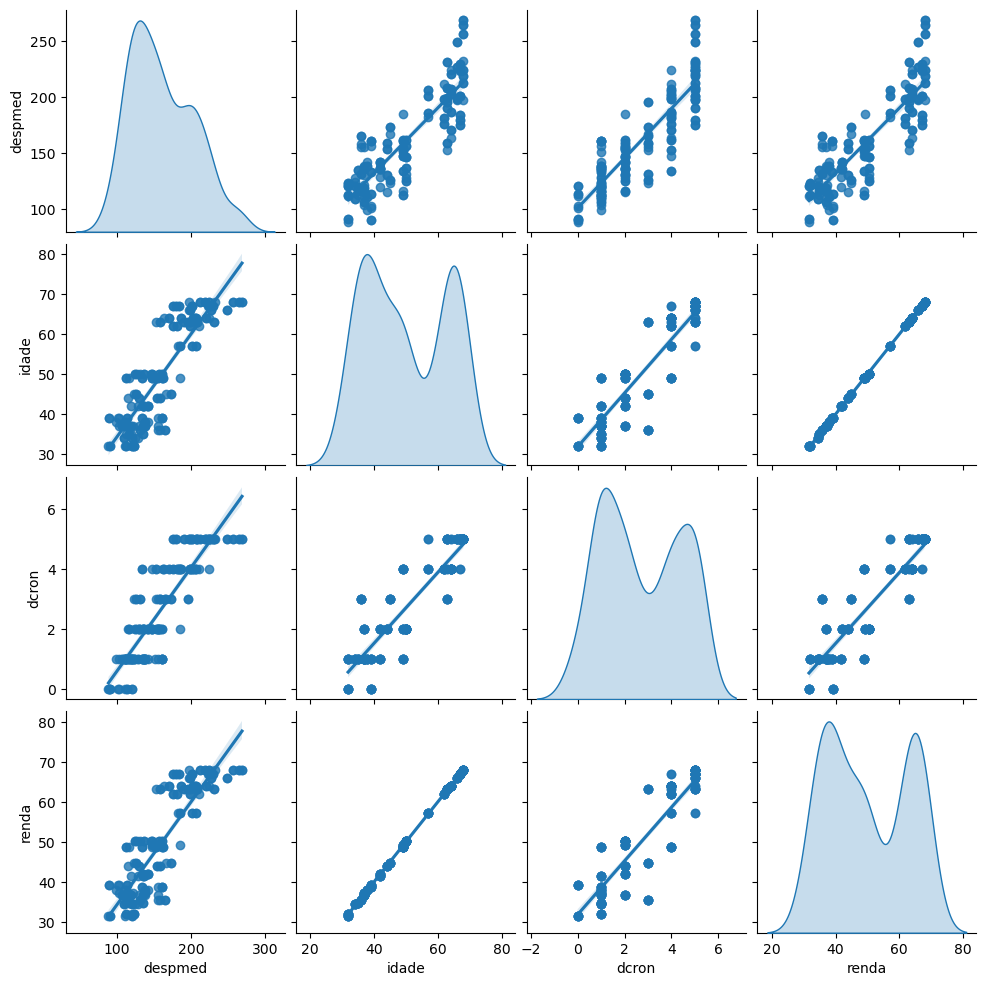

In [11]:
#Scatter Matrix
sns.pairplot(planosaude, diag_kind='kde', kind='reg')
plt.show()

### Dummizando

In [15]:
planosaude_dummies = planosaude.join(pd.get_dummies(planosaude.plano))
planosaude_dummies = planosaude_dummies.drop(['bronze', 'plano'], axis=1)
planosaude_dummies

,id,despmed,idade,dcron,renda,esmeralda,ouro
rownames,,,,,,,
1,1,206.84,57,5,57.200001,0,0
2,2,184.19,67,4,67.199997,0,0
3,3,175.68,62,4,62.000000,0,0
4,4,180.04,67,5,67.199997,0,0
5,5,218.86,68,5,68.000000,0,0
...,...,...,...,...,...,...,...
196,196,159.02,63,3,63.200001,1,0
197,197,205.35,64,4,64.000000,0,0
198,198,133.64,49,4,48.799999,1,0


## Estimando Modelo Regressão Linear

In [16]:
#Estimando o modelo
#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS
import statsmodels.api as sm

modelo_planosaude = sm.OLS.from_formula(formula = 'despmed ~ idade+dcron+renda+esmeralda+ouro', data=planosaude_dummies).fit()
modelo_planosaude.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                despmed   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     262.3
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.88e-84
Time:                        20:42:08   Log-Likelihood:                -828.04
No. Observations:                 200   AIC:                             1668.
Df Residuals:                     194   BIC:                             1688.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    148.8596     12.744     11.681      0.000     123.725     173.994
idade          8.9226      5.549      1.608      0.109      -2.021      19.866
dcron          6.7232      1.600      4.201      0.000       3.567       9.879
renda         -8.4425      5.464     -1.545      0.124     -19.219       2.334
esmeralda    -35.0189      4.685     -7.474      0.000     -44.259     -25.779
ouro         -58.7653      6.075     -9.673      0.000     -70.747     -46.783
==============================================================================
Omnibus:                       25.070   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.329
Skew:                           0.622   Prob(JB):                     3.20e-11
Kurtosis:                       5.062   Cond. No.                         964.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Procedimento Stepwise

Retirar o parâmetro que apresentar um p-value > 0,05 do maior para o menor a cada rodada.<br>

In [42]:
# Retirando a Renda
modelo_planosaude = sm.OLS.from_formula(formula = 'despmed ~ idade+dcron+esmeralda+ouro', data=planosaude_dummies).fit()
modelo_planosaude.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                despmed   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     325.0
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           4.89e-85
Time:                        21:07:56   Log-Likelihood:                -829.26
No. Observations:                 200   AIC:                             1669.
Df Residuals:                     195   BIC:                             1685.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.5746     12.417     12.368      0.000     129.085     178.064
idade          0.3561      0.225      1.583      0.115      -0.088       0.800
dcron          7.2704      1.566      4.642      0.000       4.182      10.359
esmeralda    -34.9918      4.702     -7.442      0.000     -44.265     -25.719
ouro         -59.0862      6.093     -9.697      0.000     -71.103     -47.069
==============================================================================
Omnibus:                       28.603   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.043
Skew:                           0.688   Prob(JB):                     2.49e-13
Kurtosis:                       5.252   Cond. No.                         663.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Retirando a Idade
modelo_planosaude = sm.OLS.from_formula(formula = 'despmed ~ dcron+esmeralda+ouro', data=planosaude_dummies).fit()
modelo_planosaude.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                despmed   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     429.1
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           7.53e-86
Time:                        20:43:19   Log-Likelihood:                -830.54
No. Observations:                 200   AIC:                             1669.
Df Residuals:                     196   BIC:                             1682.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.4948      6.345     26.869      0.000     157.981     183.009
dcron          8.5833      1.334      6.436      0.000       5.953      11.213
esmeralda    -38.5561      4.143     -9.305      0.000     -46.728     -30.385
ouro         -63.8897      5.304    -12.045      0.000     -74.351     -53.429
==============================================================================
Omnibus:                       29.826   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.963
Skew:                           0.707   Prob(JB):                     3.51e-14
Kurtosis:                       5.331   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Teste de Verificação da Aderência dos Resíduos à Normalidade (Shapiro-Francia)

Caso os erros não sigam uma distribuição normal, o modelo não é adequado para fins preditivos. <br>
Os betas não são ajustados para que consigam fazer inferência a partir dos intervalos de confiança daqueles parâmetros e construção de cenários.

> Teste Shapiro-Francia: n >= 30

> Teste Shapiro-Wilk: n < 30


onde,

 - H0: Diferênças não são estatisticamente significantes (existe aderência à normalidade);
 - H1: Diferênças são estatisticamente significantes (não é uma normal)
 
p-value < 0,05 rejeita-se H0

In [19]:
from scipy.stats import shapiro

stat, p_value = shapiro(modelo_planosaude.resid)
stat , p_value

(0.9445379972457886, 5.809987442262354e-07)

**Não há aderência dos termos de erro à normalidade**

<AxesSubplot:>

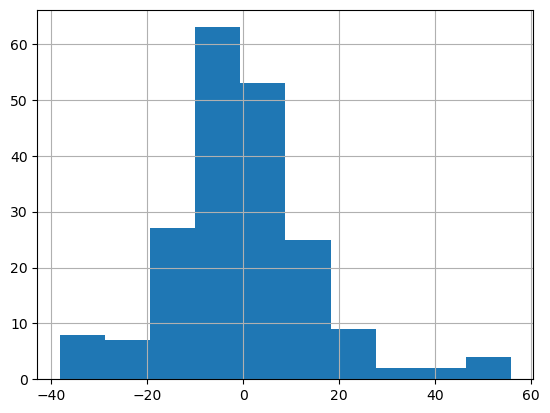

In [20]:
modelo_planosaude.resid.hist()

## Diagnóstico de Heterocedasticidade

### Teste de Breusch-Pagan

> H0: Ausência de heterocedasticidade

> H1: heterocedasticidade, ou seja, correlação entre resíduos e uma ou mais variáveis explicativas, o que indica omissão de variável relevante!

P-value < 0,05 existe heterocedasticidade <br>
P-value >= 0,05 é homogênio

In [36]:
df_aux = pd.DataFrame()
df_aux['yhat'] = modelo_planosaude.fittedvalues
df_aux['resid'] = modelo_planosaude.resid
#df_aux = modelo_planosaude.dropna(axis=0, subset='saeb')
df_aux['up'] = ((modelo_planosaude.resid**2)/ ((sum(modelo_planosaude.resid**2))/(planosaude.index.size)))
df_aux

,yhat,resid,up
rownames,,,
1,213.411485,-6.571485,0.182312
2,204.828144,-20.638144,1.798162
3,204.828144,-29.148144,3.586818
4,213.411485,-33.371485,4.701523
5,213.411485,5.448515,0.125327
...,...,...,...
196,157.688693,1.331307,0.007482
197,204.828144,0.521856,0.001150
198,166.272034,-32.632034,4.495477


### ANOVA

In [37]:
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df_aux, res_var='up', anova_model=f'up ~ yhat')
round(res.anova_summary,3)

,df,sum_sq,mean_sq,F,PR(>F)
yhat,1.0,121.604,121.604,32.336,0.0
Residual,198.0,744.606,3.761,NaN,NaN


In [38]:
from scipy.stats import chi2

mean = 121.604/2

p = 1- chi2.cdf(mean, 1)
# Resultado teste Breush-Pagen

print(f'Chi2: {mean}')
print(f'P-value: {p}')

Chi2: 60.802
P-value: 6.328271240363392e-15


**Existe variável omitida importante que poderia ser incluída**<br>
**Existe heterodasticidade**

# Gráfico dos Resíduos em Função do Yhat

Existe a formação de um cone.

Variância não constante dos termos de erro em relação aos fitted values do modelo stepwise

<AxesSubplot:xlabel='yhat', ylabel='resid'>

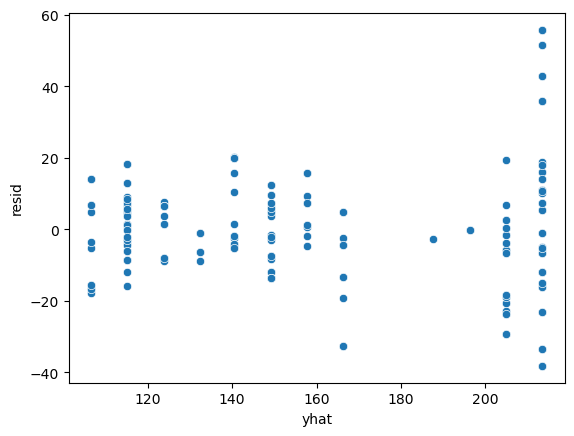

In [39]:
sns.scatterplot(df_aux.yhat, df_aux.resid)

### Transformação de Box-Cox

O modelo não possui resíduos aderentes à normalidade. Devemos transformar a variável Y em uma normal aplicando o método de Box Cox:
<br>
<br>

<center><img src='img\box_cox.jpg'></center>


- Lâmbda 1: linear
- Lâmbda 2: quadrática
- Lâmbda 3: cúbica
- Lâmbda -1: inversa
- Lâmbda 0,5: raiz
- Lâmbda -0,5: raiz inversa
- Lâmbda 0: ln(y

Lâmbda varia de -infinito a +infinito.

<b>Objetivo é encontrar qual o lâmbda que maximiza a aderência do Y à normalidade.</b>


<b> A padronização pelo Z-Score NÃO normaliza, a distribuição se mantém a mesma.<b>

In [40]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
from scipy import stats

y_lamb, lambida_otimo = stats.boxcox(planosaude.despmed)
lambida_otimo

-0.14436741694478952

In [41]:
planosaude_dummies['bc_despmed'] = y_lamb
planosaude_dummies

,id,despmed,idade,dcron,renda,esmeralda,ouro,bc_despmed
rownames,,,,,,,,
1,1,206.84,57,5,57.200001,0,0,3.718813
2,2,184.19,67,4,67.199997,0,0,3.664649
3,3,175.68,62,4,62.000000,0,0,3.642295
4,4,180.04,67,5,67.199997,0,0,3.653899
5,5,218.86,68,5,68.000000,0,0,3.744867
...,...,...,...,...,...,...,...,...
196,196,159.02,63,3,63.200001,1,0,3.594710
197,197,205.35,64,4,64.000000,0,0,3.715463
198,198,133.64,49,4,48.799999,1,0,3.510008


### Novo Modelo Com Box-Cox

In [43]:
modelo_bc_planosaude = sm.OLS.from_formula(formula = 'bc_despmed ~ idade+dcron+renda+esmeralda+ouro', data=planosaude_dummies).fit()
modelo_bc_planosaude.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_despmed   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     325.5
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.80e-92
Time:                        21:08:29   Log-Likelihood:                 355.33
No. Observations:                 200   AIC:                            -698.7
Df Residuals:                     194   BIC:                            -678.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5507      0.034    103.431      0.000       3.483       3.618
idade          0.0146      0.015      0.980      0.328      -0.015       0.044
dcron          0.0231      0.004      5.360      0.000       0.015       0.032
renda         -0.0136      0.015     -0.924      0.357      -0.043       0.015
esmeralda     -0.0820      0.013     -6.494      0.000      -0.107      -0.057
ouro          -0.1791      0.016    -10.944      0.000      -0.211      -0.147
==============================================================================
Omnibus:                        3.284   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                2.871
Skew:                          -0.246   Prob(JB):                        0.238
Kurtosis:                       3.319   Cond. No.                         964.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Stepwise do Modelo Box-Cox

In [44]:
#Retira a Renda
step_bc_planosaude = sm.OLS.from_formula(formula = 'bc_despmed ~ idade+dcron+esmeralda+ouro', data=planosaude_dummies).fit()
step_bc_planosaude.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_despmed   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     407.0
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.99e-93
Time:                        21:10:03   Log-Likelihood:                 354.89
No. Observations:                 200   AIC:                            -699.8
Df Residuals:                     195   BIC:                            -683.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5583      0.033    106.798      0.000       3.493       3.624
idade          0.0008      0.001      1.394      0.165      -0.000       0.002
dcron          0.0240      0.004      5.708      0.000       0.016       0.032
esmeralda     -0.0819      0.013     -6.493      0.000      -0.107      -0.057
ouro          -0.1796      0.016    -10.987      0.000      -0.212      -0.147
==============================================================================
Omnibus:                        2.551   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.156
Skew:                          -0.198   Prob(JB):                        0.340
Kurtosis:                       3.320   Cond. No.                         663.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Retira a Idade
step_bc_planosaude = sm.OLS.from_formula(formula = 'bc_despmed ~ dcron+esmeralda+ouro', data=planosaude_dummies).fit()
step_bc_planosaude.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_despmed   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     539.4
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.07e-94
Time:                        21:10:36   Log-Likelihood:                 353.90
No. Observations:                 200   AIC:                            -699.8
Df Residuals:                     196   BIC:                            -686.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5983      0.017    211.642      0.000       3.565       3.632
dcron          0.0271      0.004      7.582      0.000       0.020       0.034
esmeralda     -0.0903      0.011     -8.137      0.000      -0.112      -0.068
ouro          -0.1910      0.014    -13.437      0.000      -0.219      -0.163
==============================================================================
Omnibus:                        2.456   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                2.071
Skew:                          -0.185   Prob(JB):                        0.355
Kurtosis:                       3.333   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Teste Shapiro-Francia no Modelo Box-Cox

In [46]:
from scipy.stats import shapiro

stat, p_value = shapiro(step_bc_planosaude.resid)
stat , p_value

(0.9857446551322937, 0.041268423199653625)

**O valor do teste shapiro-francia no R o modelo fica com p-valor de 0.05846** <br>
**Modelo passa no teste de normalidade dos resíduos**

<AxesSubplot:>

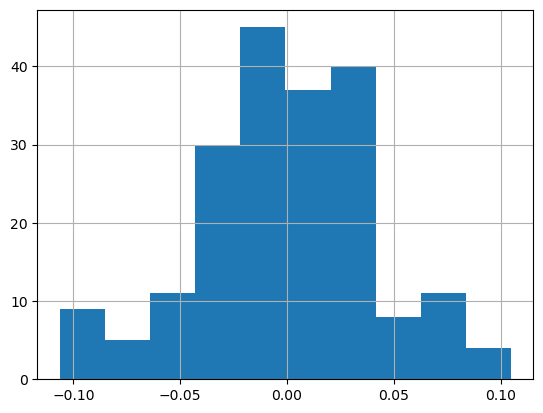

In [47]:
step_bc_planosaude.resid.hist()

### Teste de Heterocedasticidade no Modelo Box-Cox

In [49]:
df_aux_bc = pd.DataFrame()
df_aux_bc['yhat'] = step_bc_planosaude.fittedvalues
df_aux_bc['resid'] = step_bc_planosaude.resid
df_aux_bc['up'] = ((step_bc_planosaude.resid**2)/ ((sum(step_bc_planosaude.resid**2))/(planosaude.index.size)))

#Anova
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df_aux_bc, res_var='up', anova_model=f'up ~ yhat')
round(res.anova_summary,3)

,df,sum_sq,mean_sq,F,PR(>F)
yhat,1.0,2.025,2.025,0.863,0.354
Residual,198.0,464.620,2.347,NaN,NaN


In [50]:
from scipy.stats import chi2

mean = 2.025/2

p = 1- chi2.cdf(mean, 1)
# Resultado teste Breush-Pagen

print(f'Chi2: {mean}')
print(f'P-value: {p}')

Chi2: 1.0125
P-value: 0.31430466047385386


**Modelo de Box-Cox é homogêneo, não existe heterocedasticidade**

# Gráfico dos Resíduos em Função do Yhat do modelo Box-Cox

A formação do Cone é menos acentuada.

<AxesSubplot:xlabel='yhat', ylabel='resid'>

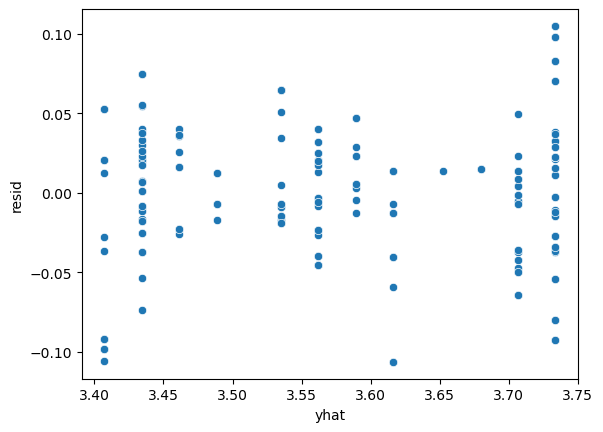

In [51]:
sns.scatterplot(df_aux_bc.yhat, df_aux_bc.resid)